In [2]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.23983531 0.83543507 0.49562939 ... 0.84499016 0.38409371 0.52856668]
 [0.23061549 0.803319   0.47657624 ... 0.81250677 0.36932826 0.50824734]
 [0.19386833 0.67531507 0.40063676 ... 0.68303882 0.31047808 0.42726126]
 ...
 [0.23754751 0.82746582 0.49090156 ... 0.83692976 0.38042983 0.52352466]
 [0.16219702 0.56499218 0.33518671 ... 0.57145415 0.25975681 0.3574617 ]
 [0.12696144 0.44225363 0.26237096 ... 0.4473118  0.2033274  0.27980694]]

Noisy Matrix (with Homoscedastic Noise):
[[0.10349713 0.58543437 0.53945724 ... 0.8596683  0.14547422 0.53158747]
 [0.36059275 0.77409987 0.48893602 ... 0.78218736 0.23076861 0.43270247]
 [0.15365197 0.65265315 0.3648617  ... 0.63335577 0.49461031 0.41555394]
 ...
 [0.27609214 0.92002276 0.62510098 ... 0.72719301 0.3574354  0.59243199]
 [0.10171705 0.66479454 0.38670893 ... 0.61321845 0.15380242 0.43411047]
 [0.19732079 0.25498109 0.37474275 ... 0.40123896 0.20328774 0.21611713]]


In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix,
               prior_L = "exp",
               prior_F = "exp")
K=5
K=5

[IterativeSVD] Iter 1: observed MAE=0.079760
[IterativeSVD] Iter 2: observed MAE=0.075965
[IterativeSVD] Iter 3: observed MAE=0.070036
[IterativeSVD] Iter 4: observed MAE=0.059008
[IterativeSVD] Iter 5: observed MAE=0.053566
[IterativeSVD] Iter 6: observed MAE=0.053580
[IterativeSVD] Iter 7: observed MAE=0.053589
[IterativeSVD] Iter 8: observed MAE=0.053594
[IterativeSVD] Iter 9: observed MAE=0.053596


In [5]:
K = np.min([K, U.shape[1]])
print(K)

5


In [6]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.079760
[IterativeSVD] Iter 2: observed MAE=0.075965
[IterativeSVD] Iter 3: observed MAE=0.070036
[IterativeSVD] Iter 4: observed MAE=0.059008
[IterativeSVD] Iter 5: observed MAE=0.053566
[IterativeSVD] Iter 6: observed MAE=0.053580
[IterativeSVD] Iter 7: observed MAE=0.053589
[IterativeSVD] Iter 8: observed MAE=0.053594
[IterativeSVD] Iter 9: observed MAE=0.053596
[ 2.77689775e-01 -6.85909157e-02 -7.02186308e-02 -5.30823321e-02
 -6.45049980e-02  1.37671808e-02 -3.08556276e-01  1.02615339e-01
  1.05803055e-01 -8.70850727e-02 -1.65337771e-01 -2.72500475e-01
  1.13246789e-01  1.93440276e-01 -2.31495771e-01 -4.74324067e-01
 -2.19084518e-01 -2.00694340e-01  9.54390926e-02 -1.00003874e-04
  2.67837077e-01  3.50463375e-02  2.54615606e-01  6.07936883e-02
 -5.99628514e-02  2.28703221e-01 -2.79957147e-01 -9.32240903e-02
  2.51010631e-01 -1.52245775e-01  5.83646358e-02  2.1337

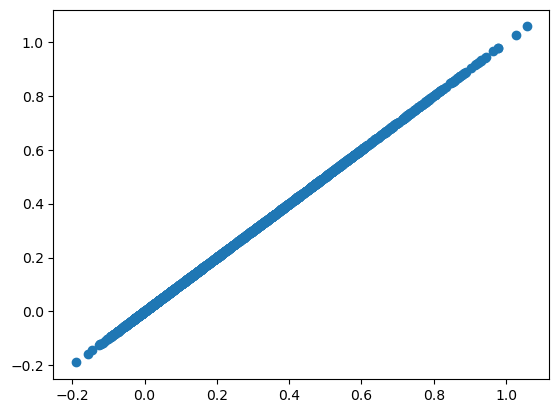

In [7]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

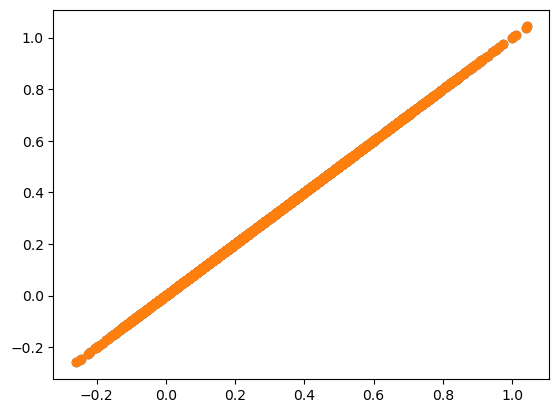

In [8]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [9]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00701396, 0.00701396, 0.00701396, ..., 0.00701396, 0.00701396,
        0.00701396],
       [0.00701396, 0.00701396, 0.00701396, ..., 0.00701396, 0.00701396,
        0.00701396],
       [0.00701396, 0.00701396, 0.00701396, ..., 0.00701396, 0.00701396,
        0.00701396],
       ...,
       [0.00701396, 0.00701396, 0.00701396, ..., 0.00701396, 0.00701396,
        0.00701396],
       [0.00701396, 0.00701396, 0.00701396, ..., 0.00701396, 0.00701396,
        0.00701396],
       [0.00701396, 0.00701396, 0.00701396, ..., 0.00701396, 0.00701396,
        0.00701396]])

In [10]:
 
mycebmf.update_loading_factor_k(k=0)

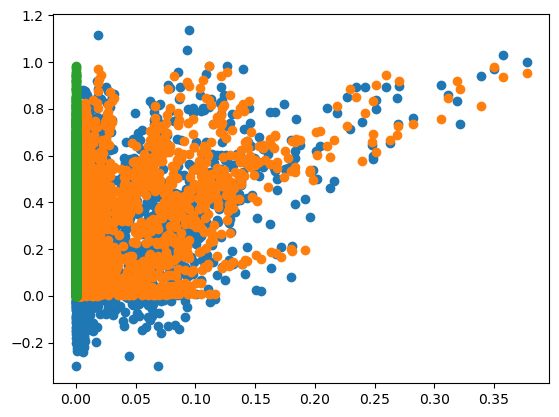

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

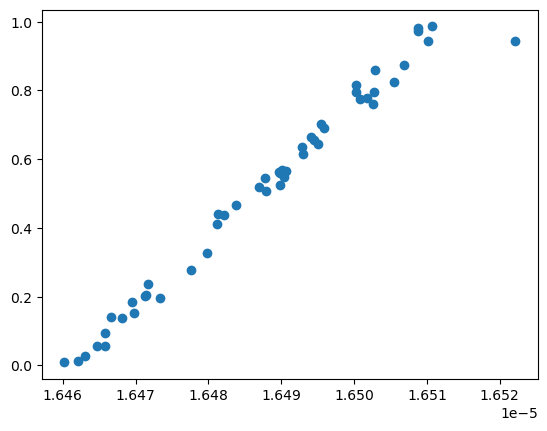

In [12]:
plt.scatter(mycebmf.L[:,0], u)

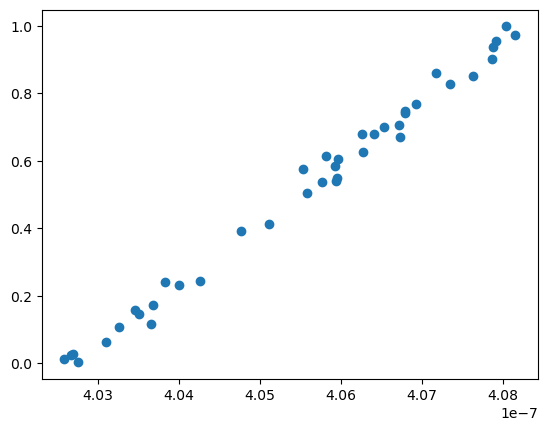

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
mycebmf.kl_l

array([ 0, 89, 68, 61, 86])

In [16]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [17]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

-328.9311770809727

In [18]:
mycebmf.tau

array([[7.09797507, 7.09797507, 7.09797507, ..., 7.09797507, 7.09797507,
        7.09797507],
       [7.09797507, 7.09797507, 7.09797507, ..., 7.09797507, 7.09797507,
        7.09797507],
       [7.09797507, 7.09797507, 7.09797507, ..., 7.09797507, 7.09797507,
        7.09797507],
       ...,
       [7.09797507, 7.09797507, 7.09797507, ..., 7.09797507, 7.09797507,
        7.09797507],
       [7.09797507, 7.09797507, 7.09797507, ..., 7.09797507, 7.09797507,
        7.09797507],
       [7.09797507, 7.09797507, 7.09797507, ..., 7.09797507, 7.09797507,
        7.09797507]])

In [19]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[  0 310 162 226  96]
[  0 316  89  82  28]


In [20]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

-980.5351303946964
[  0 310 162 226  96]
[  0 316  89  82  28]
6.403542950397552
-527.5297021645442
[inf, 2302.3715111285533, 328.46487116615833]


In [21]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 2302.3715111285533, 328.46487116615833, -175.6374513967544]


In [22]:
for i in range(20):
    mycebmf.iter()



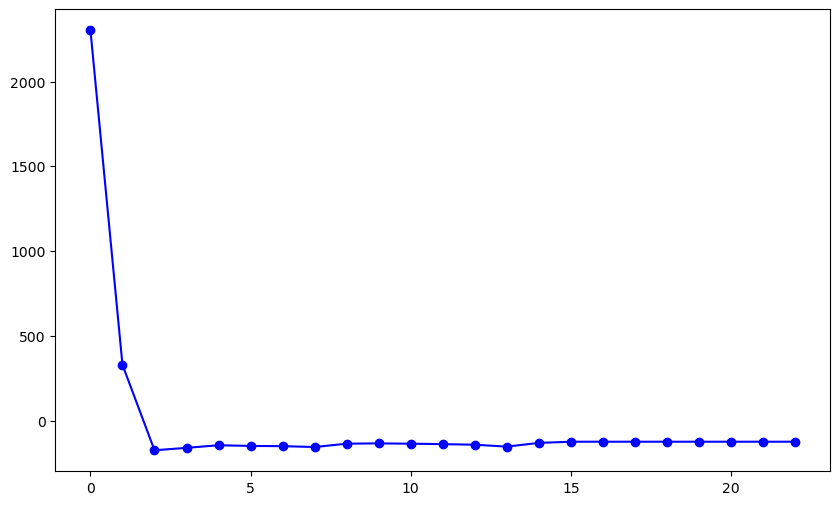

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

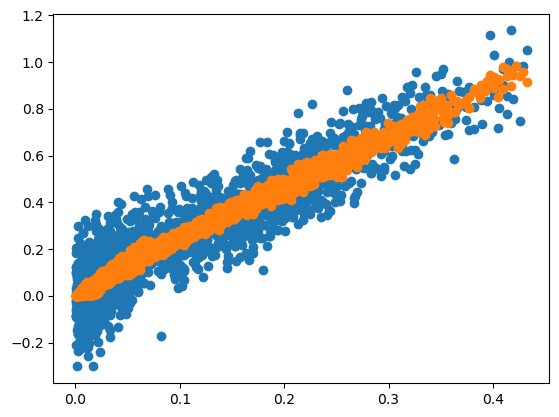

In [25]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
